In [1]:
] activate "C:\Users\Arman Angaji\OneDrive - Universität zu Köln\Dokumente\Uni-Köln\Masterarbeit\Workspace\Julia_Master\MasterProject_Julia"

 Activating environment at `C:\Users\Arman Angaji\OneDrive - Universität zu Köln\Dokumente\Uni-Köln\Masterarbeit\Workspace\Julia_Master\MasterProject_Julia\Project.toml`


In [2]:
using DataFrames
using StatsBase
using Plots
using Statistics
using LaTeXStrings

include("neutral_haplotype_growth_v1.jl")

using TumorGrowth: DataFrame, clones_by_mutations

In [5]:
b, d, μ = 1., 0.8, 0.3
tumor, obs, N, t = neutral_growth(5000; b = b, d = d, μ = μ);

Progress: N  4923 	 Time: 0:00:02

In [6]:
tumor, obs, N, t = neutral_growth!(tumor, obs, 10000; Nthresh=5000, b = b, d = d, μ = μ, t = t);

Progress: N  9388 	 Time: 0:00:00

In [8]:
tumordf = DataFrame(tumor)
htypes = tumordf[2:end,:];

In [10]:
mtypes = clones_by_mutations(tumordf)[1];

In [7]:
bumor = neutral_growth(500; b = b, d = d, μ = μ)[1] |> DataFrame
using BenchmarkTools: @btime
@btime clones_by_mutations(bumor)[1];

  54.373 ms (1446070 allocations: 34.63 MiB)


### Many runs

### n distribution

In [398]:
N = 4000
α = 1//4
Ncutoff = Int(α * N)
b, μ = 1.0, 0.3
ds = 0.0:0.05:0.9

h_estr = []
for d in ds
    n = 1
    reps = 50
    obs = Vector{Vector{Int}}(undef, reps)
    while  n<=reps
        out = neutral_growth(Ncutoff; b = b, d = d, μ = μ)
        # sum(getfield.(out[1], :n)) == 0 && continue
        mcutoff = size(out[2],1)
        out = neutral_growth!(out..., N+100; Nthresh = Ncutoff, b = b, d = d, μ = μ)
        tumor = DataFrame(out[1])
        daughters = filter(h-> h.n>0 && length(h.mutations)>1, tumor[2:end, :])
        obs[n] = out[2][last.(daughters.mutations),1]
        n+=1
    end
    print("d",d," ")
    push!(h_estr, fit(Histogram, vcat(obs...), nbins = maximum(vcat(obs...))))
end
pn_estr = [h.weights ./ sum(h.weights) for h in h_estr];

d0.0 

Progress: N  624 	 Time: 0:00:00

d0.05 

Progress: N  3626 	 Time: 0:00:00

d0.1 d0.15 

Progress: N  1960 	 Time: 0:00:00

d0.2

Progress: N  123 	 Time: 0:00:00

 d0.25 

Progress: N  1603 	 Time: 0:00:00

d0.3 

Progress: N  2169 	 Time: 0:00:00

d0.35 

Progress: N  2488 	 Time: 0:00:00

d0.4 

Progress: N  896 	 Time: 0:00:00

d0.45 

Progress: N  1630 	 Time: 0:00:00

d0.5

Progress: N  1427 	 Time: 0:00:00

Progress: N  3094 	 Time: 0:00:00

d0.55 

Progress: N  3216 	 Time: 0:00:00

d0.6

Progress: N  783 	 Time: 0:00:00

Progress: N  693 	 Time: 0:00:00m

d0.65

Progress: N  601 	 Time: 0:00:00

Progress: N  368 	 Time: 0:00:00m

d0.7

Progress: N  3876 	 Time: 0:00:00

Progress: N  375 	 Time: 0:00:00m

d0.75

Progress: N  3483 	 Time: 0:00:00

Progress: N  1962 	 Time: 0:00:00

d0.8

Progress: N  905 	 Time: 0:00:00

Progress: N  1362 	 Time: 0:00:00

d0.85 

Progress: N  4015 	 Time: 0:00:00

d0.9 

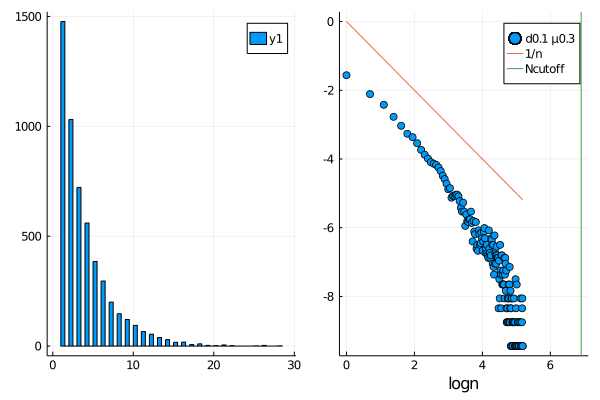

In [402]:
h = h_estr[3]

p1 = histogram(vcat(obs...))

p2 = scatter(log.(h.edges[1][1:end-1]), log.(h.weights) .- log(sum(h.weights)), lab="d$(ds[3]) μ$μ")
plot!(log.(h.edges[1][1:end-1]), logn -> -logn, lab="1/n")
vline!([log(Ncutoff)], lab="Ncutoff", xlab=:logn)

plot(p1,p2)

In [404]:
N = 4000
α = 1//4
Ncutoff = Int(α * N)
b, μ = 1.0, 0.02
ds = 0.0:0.05:0.9

h_estr = []
for d in ds
    n = 1
    reps = 100
    obs = [[Int[] for m=1:5*ceil(Int,μ*b/(b-d))*Ncutoff] for n=1:reps]
    while  n<=reps
        out = neutral_growth(Ncutoff; b = b, d = d, μ = μ)
        # sum(getfield.(out[1], :n)) == 0 && continue
        mcutoff = size(out[2],1)
        #out = neutral_growth!(out..., N; Nthresh = Ncutoff, b = b, d = d, μ = μ)
        tumor = DataFrame(out[1])
        daughters = filter(h-> h.n>0 && length(h.mutations)>1, tumor[2:end, :])
        for muts in daughters.mutations
            push!(obs[n][muts[end-1]], out[2][last(muts),1])
        end
        n+=1
    end
    print("d",d," ")
    push!(h_estr, filter.(!isempty, obs))
end
#pn_estr = [h.weights ./ sum(h.weights) for h in h_estr];

d0.0 d0.05 d0.1 d0.15 d0.2 d0.25 d0.3 d0.35 

Progress: N  249 	 Time: 0:00:00

d0.4 d0.45 d0.5 d0.55 

Progress: N  259 	 Time: 0:00:00

d0.6 d0.65 

Progress: N  160 	 Time: 0:00:00

d0.7 d0.75 

Progress: N  288 	 Time: 0:00:00

d0.8

Progress: N  16 	 Time: 0:00:00

 d0.85 

Progress: N  644 	 Time: 0:00:00

d0.9 

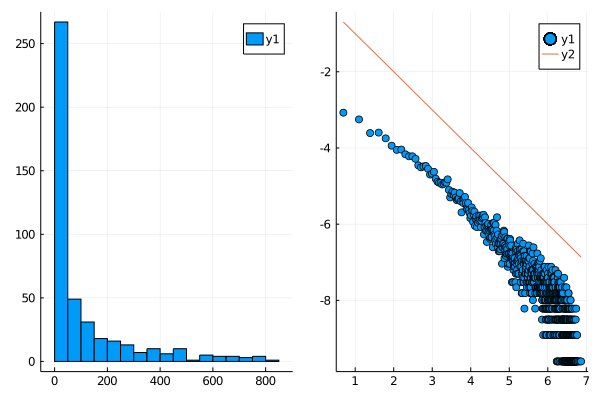

In [406]:
p1 = histogram(vcat(vcat(rand(h_estr)...)...))
hist = fit(Histogram, vcat(vcat(vcat(h_estr...)...)...), nbins = Ncutoff)
p2 = scatter(log.(hist.edges[1][2:end]), log.(hist.weights ./ sum(hist.weights)) )
plot!(log.(hist.edges[1][2:end]), logM -> -logM)
plot(p1,p2, layout = 2)

In [24]:
N = 4000
α = 1//4
Ncutoff = Int(α * N)
b, μ = 0.9, 0.1
ds = 0.0:0.05:0.85

h_orph = []
for d in ds
    n = 1
    reps = 100
    obs = Vector{Vector{Int}}(undef, reps)
    while  n<=reps
        out = neutral_growth(Ncutoff; b = b, d = d, μ = μ)
        # sum(getfield.(out[1], :n)) == 0 && continue
        mcutoff = size(out[2],1)
        out = neutral_growth!(out..., N; Nthresh=Ncutoff, b = b, d = d, μ = μ)
        tumor = DataFrame(out[1])
        daughters = filter(h-> h.n>0 && length(h.mutations)>1, tumor[2:mcutoff, :])
        obs[n] = out[2][last.(daughters.mutations),2]
        n+=1
    end
    print("d",d," ")
    push!(h_orph, fit(Histogram, vcat(obs...), nbins = maximum(vcat(obs...))))
end
pn_orph = [h.weights ./ sum(h.weights) for h in h_orph];

d0.0 d0.05 d0.1 d0.15 d0.2 d0.25 d0.3 d0.35 d0.4 d0.45 d0.5 d0.55 d0.6 d0.65 d0.7 d

Progress: N  3353 	 Time: 0:00:00

0.75 

Progress: N  3424 	 Time: 0:00:00

d0.8 

Progress: N  3138 	 Time: 0:00:00

d0.85 

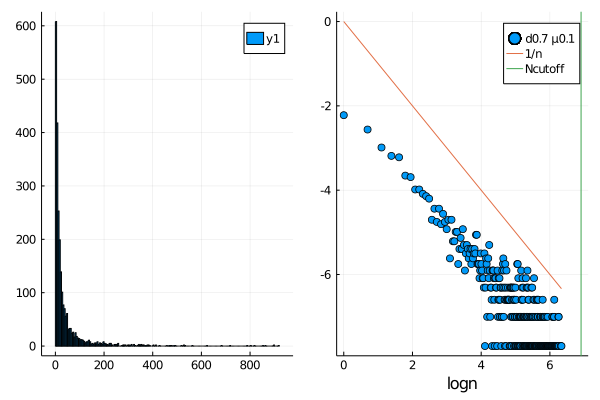

In [103]:
h = h_orph[3]

p1 = histogram(vcat(obs...))

p2 = scatter(log.(h.edges[1][1:end-1]), log.(h.weights) .- log(sum(h.weights)), lab="d$d μ$μ")
plot!(log.(h.edges[1][1:end-1]), logn -> -logn, lab="1/n")
vline!([log(Ncutoff)], lab="Ncutoff", xlab=:logn)

plot(p1,p2)

### N distribution

In [310]:
N = 4000
Nthresh = N ÷ 4
b, d, μ = 0.9,0.7, 0.3

reps = 100
obs = Vector{Vector{Int}}(undef, reps)
let n=1
    @time while n<=reps
        out = neutral_growth(Nthresh; b = b, d = d, μ = μ)
        # sum(getfield.(out[1], :n)) == 0 && continue
        mcutoff = size(out[2],1)
        out = neutral_growth!(out..., N; Nthresh=Nthresh, b = b, d = d, μ = μ)
        tumor = DataFrame(out[1])
        daughters = filter(h-> h.n>-1 && length(h.mutations)>0, tumor[2:mcutoff, :])
#         parents_m = [length(mut)==1 ? 0 : mut[end-1] for mut in daughters.mutations]
        parents_m = collect(1:size(out[2],1))
        obs[n] = [ iszero(m) ? 0 : out[2][m,3] for m in parents_m]
        n+=1
    end
end

Progress: N  3554 	 Time: 0:00:00

 15.973003 seconds (101.41 M allocations: 14.425 GiB, 8.40% gc time)


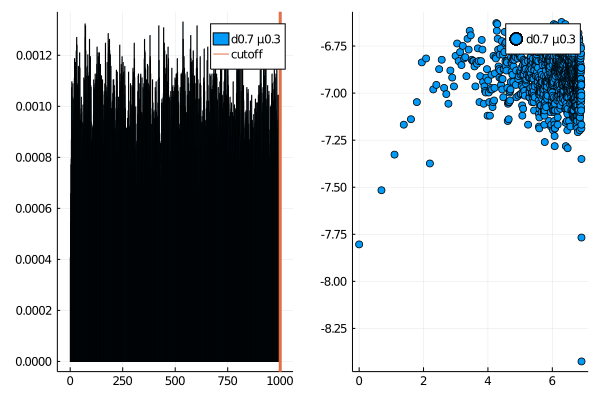

In [311]:
h_fullsize = fit(Histogram, vcat(obs...), nbins=Nthresh )
p1 = scatter( log.(h_fullsize.edges[1][1:end-1]), log.(h_fullsize.weights ./ sum(h_fullsize.weights)), lab="d$d μ$μ")
# plot!(log.(h_fullsize.edges[1][1:end-1]), logn -> -logn, lab="")

p2 = bar( h_fullsize.edges[1][1:end-1], h_fullsize.weights ./ sum(h_fullsize.weights), lab="d$d μ$μ")
#vline!([N], lab="N", lw=3.)
vline!([Nthresh], lab="cutoff", lw=3.)

plot(p2, p1)

In [109]:
pN = (h_fullsize.weights ./ sum(h_fullsize.weights));

### M distribtution

In [41]:
N = 4000
α = 1//4
Ncutoff = Int(α * N)
b, d, μ = 1.,0.3, 0.1

reps = 1000
obs = Vector{Vector{Int}}(undef, reps)
@time for n=1:reps
    out = neutral_growth(Ncutoff; b = b, d = d, μ = μ)
    #out = neutral_growth!(out..., Ncutoff + 50; Nthresh=Ncutoff, b = b, d = d, μ = μ)
    tumor = DataFrame(out[1])
#     daughters = filter(h -> h.n>0 && length(h.mutations)>1, tumor)
#     parents_m = [muts[end-1] for muts=daughters.mutations]
    parents_m = collect(1:nrow(tumor)-1)

    obs[n] = tumor.n[parents_m .+ 1]
end

  3.806573 seconds (37.22 M allocations: 1.841 GiB, 6.62% gc time)


M max: 665 | Ncutoff^(1-μ*β): 372.7593720314939


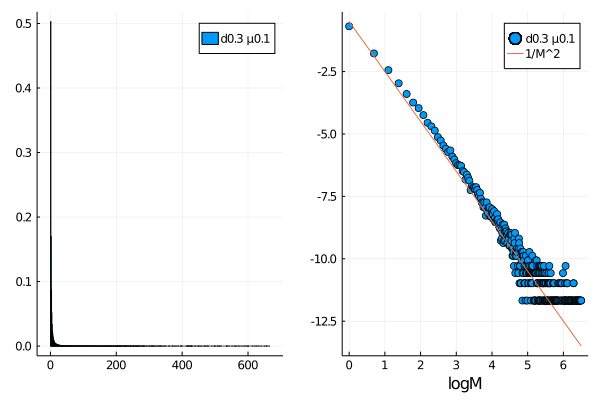

In [56]:
h_M = fit(Histogram, filter(!iszero, vcat(obs...)), nbins= Ncutoff )
p1 = bar(h_M.edges[1][1:end-1], h_M.weights ./ sum(h_M.weights), lab="d$d μ$μ")
logM = log.(h_M.edges[1][1:end-1])
p2 = scatter(logM, log.(h_M.weights ./ sum(h_M.weights)), lab="d$d μ$μ", xlab=:logM)
# plot!(logM, logn-> -logn, lab="1/M", c=:red)
# plot!(logM, logn-> -(1-μ*b/(b-d))*logn, lab="1-μβ", c=:black)
plot!(log.(h_M.edges[1][1:end-1]), logn-> -2*logn - log(sum(1/M^2 for M=1:Ncutoff^(1-μ*b/(b-d)))) ,lab="1/M^2")
println("M max: ",maximum(vcat(obs...)), " | Ncutoff^(1-μ*β): ", Ncutoff^(1-μ*b/(b-d)))
plot(p1,p2)

In [17]:
N = 4000
α = 1//4
Ncutoff = Int(α * N)
b, d, μ = 1.,0.6, 0.3

reps = 100

obsM = [Int[] for N1=1:Ncutoff]
let n=1
    @time while n<=reps
        out = neutral_growth(Ncutoff; b = b, d = d, μ = μ)
        # sum(getfield.(out[1], :n)) == 0 && continue
        mcutoff = size(out[2],1)
        #out = neutral_growth!(out..., Ncutoff + 50; Nthresh=Ncutoff, b = b, d = d, μ = μ)
        tumor = DataFrame(out[1])
        daughters = filter(h -> h.n>0 && length(h.mutations)>1, tumor[2:mcutoff, :])
        #parents_m = [muts[end-1] for muts=daughters.mutations]
        parents_m = collect(1:mcutoff)
        mtypes = clones_by_mutations(tumor)[1]
        for m in parents_m
            N1 = out[2][m, 3]
#             push!(obsM[N1], tumor.n[m + 1])
            push!(obsM[N1], sum(mtypes[m].n)) 
        end
        n+=1
    end
end

  9.535261 seconds (177.69 M allocations: 4.849 GiB, 6.27% gc time)


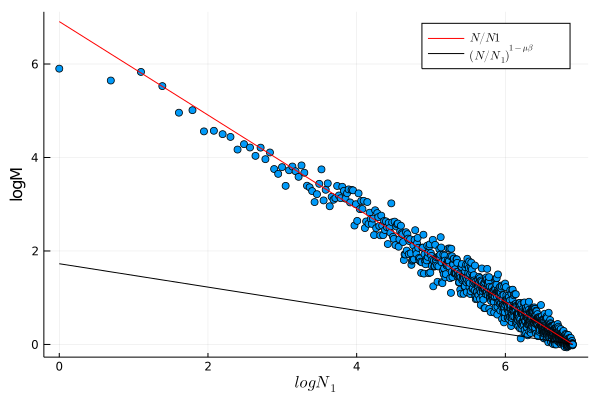

In [18]:
Ms = filter(!isnan, mean.(obsM))
dM = filter(!isnan, std.(obsM))
N1s = findall(!isnan, mean.(obsM))

scatter(log.(N1s), log.(Ms), ylab=:logM, xlab=L"logN_1", lab="")#, yerror = log.(dM))
plot!(log.(N1s), logN -> log(Ncutoff) - logN, lab=L"N/N1", c=:red)
plot!(log.(N1s), logN -> (1-μ*b/(b-d)) * (log(Ncutoff) - logN), lab=L"(N/N_1)^{1-\mu \beta}", c=:black)

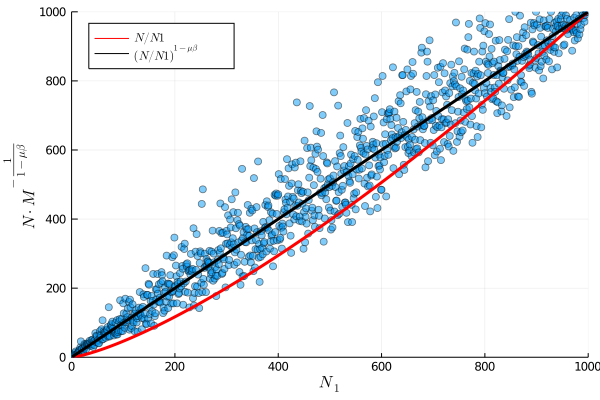

In [15]:
scatter(N1s, Ncutoff ./ Ms.^(1/(1-μ*b/(b-d))), lab="", alpha=0.5 )
plot!(N1s, Ncutoff ./ (Ncutoff ./ N1s).^(1/(1-μ*b/(b-d))), lab=L"N/N1", c=:red, lw=3. )
plot!(N1s, N1s, xlims=(0,1000), ylims=(0,1000), lab=L"(N/N1)^{1-\mu \beta}", c=:black, legend=:topleft, lw=3. )
plot!(xlab=L"N_1", ylab=L"N\cdot M^{-\frac{1}{1-\mu \beta}}")

In [22]:
N = 4000
α = 1//4
Ncutoff = Int(α * N)
b, d, μ = 1.,0.3, 0.1

reps = 500
obs = Vector{Vector{Int}}(undef, reps)
@time for n in 1:reps
    out = neutral_growth(Ncutoff; b = b, d = d, μ = μ)

    tumor = DataFrame(out[1])
#         daughters = filter(h -> h.n>0 && length(h.mutations)>1, tumor)
    mtypes = clones_by_mutations(tumor)[1]

    obs[n] = sum.(getproperty.(mtypes,:n))

#     obs[n] = daughters.mutations .|> muts -> begin
#         m = last(muts)
#         if length(muts)==1
#              sum(tumor.n) - sum(mtypes[m].n)
#         else
#             sum(mtypes[muts[end-1]].n) - sum(mtypes[m].n)
#         end
#     end
end

  3.065888 seconds (31.20 M allocations: 1.366 GiB, 6.75% gc time)


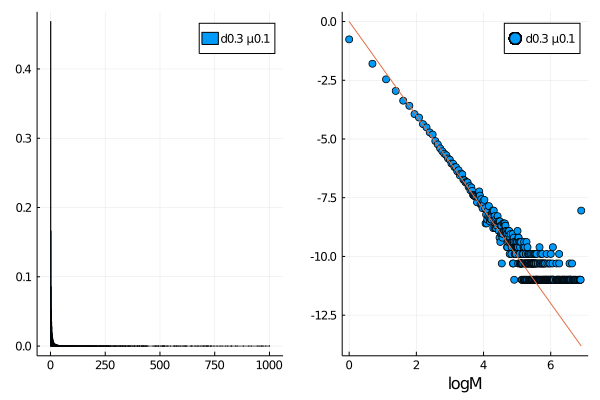

In [23]:
h_M = fit(Histogram, filter(!iszero, vcat(obs...)), nbins= Ncutoff)
logM = log.(h_M.edges[1][1:end-1])
p1 = bar(h_M.edges[1][1:end-1], h_M.weights ./ sum(h_M.weights), lab="d$d μ$μ")
p2 = scatter( logM , log.(h_M.weights ./ sum(h_M.weights)), lab="d$d μ$μ", xlab=:logM)
# plot!(logM , logn-> -logn,lab="")
plot!(logM , logn-> -2*logn,lab="")
plot(p1,p2)

In [35]:
pM = (h_M.weights ./ sum(h_M.weights));

#### N is set to 4000 for all runs

In [295]:
N = 4000
α = 1//4
Ncutoff = Int(α * N)

1000

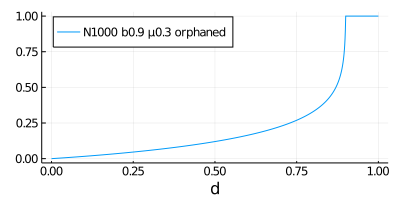

In [302]:
b, μ = 0.9, 0.3
ds = 0.0:0.001:1.
po = [ q >= 1. ? 1. : q/(1-q) * sum( 1 - q^(Ncutoff/n) for n = 1:Ncutoff) / (Ncutoff * sum(1/n for n = 1:Ncutoff)) for q in ds ./ b]

p_orph = plot(ds, po, lab="N$Ncutoff b$b μ$μ orphaned", legend=:topleft, xlab=:d, size=(400,200))

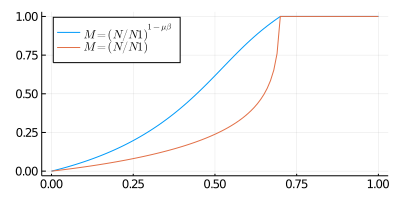

In [276]:
b, μ = 1., 0.1

ds = 0.0:0.01:1.
po = similar(collect(ds))
for (i, d) in enumerate(ds)
    q = d / (b*(1-μ))
    
    if q >= 1
        po[i] = 1.
    else
        po[i] = sum( 1 - q^( (Ncutoff/n)^(1-b*μ/(b-d)) ) for n = 1:Ncutoff)
        po[i] *= q/(1-q)
        po[i] /= sum((Ncutoff/n)^(1-b*μ/(b-d)) for n = 1:Ncutoff)
    end
end

po = [ q >= 1. ? 1. : q/(1-q) * sum( 1 - q^(Ncutoff/n) for n = 1:Ncutoff) / (Ncutoff * sum(1/n for n = 1:Ncutoff)) for q in ds ./ (b*(1-μ))]

p_estr = plot!(ds, po, lab=L"M = (N/N1)" ,
# p_estr = plot(ds, po, lab=L"M = (N/N1)^{1-\mu \beta}" ,
# p_estr = plot(ds, po, lab="N$Ncutoff b$b μ$μ estranged" ,
    legend=:topleft, size=(400,200))

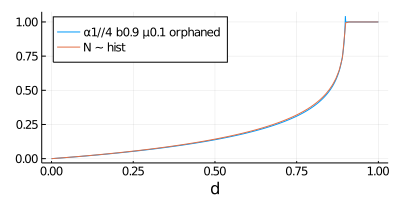

In [157]:
b = 0.9
ds = 0.0:0.01:1.

# po = [ q>=1. ? 1. : q/(1-q) * sum( (1 - q^(Ncutoff/n))/(Ncutoff/n) *pN[n] for n = 1:length(pN)) / sum(pN[n] for n = 1:length(pN)) for q in ds ./ b]
po = [ q>=1. ? 1. : q/(1-q) * sum( (1 - q^(Ncutoff/n)) *pN[n] for n = 1:length(pN)) / sum( Ncutoff/n * pN[n] for n = 1:length(pN)) for q in ds ./ b]

plot!(p_orph, ds, po, lab="N ~ hist", legend=:topleft)

### M estimate

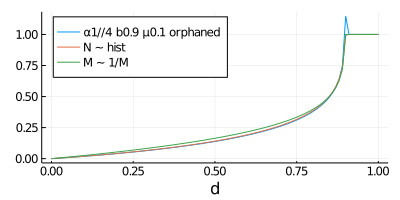

In [82]:
b = 0.9
po = [q >=1. ? 1. : q/(1-q) * sum( (1 - q^M) * 1/M^2 for M = 1:Ncutoff) / sum(1/M for M = 1:Ncutoff) for q in ds ./ b]
plot!(p_orph, ds, po, lab="M ~ 1/M", legend=:topleft)

# po = [q >=1. ? 1. : q/(1-q) * sum( (1 - q^M)/M * pM[M] for M = 1:Ncutoff) / sum(pM[M] for M = 1:Ncutoff) for q in ds ./ b]
# plot!(p_orph, ds, po, lab="M ~ hist", legend=:topleft)

In [ ]:
b = 1.
po = [q >=1. ? 1. : q/(1-q) * sum( (1 - q^M) * 1/M *  for M = 1:Ncutoff) / sum(1/M for M = 1:Ncutoff) for q in ds ./ b]

plot!(p_estr, ds, po, lab="", legend=:topleft)

### n estimate

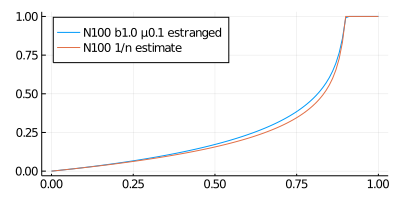

In [181]:
b = 1.

pn = [q >= 1. ? 1. : sum( q^n*1/n for n=1:Ncutoff) / sum( 1/n for n=1:Ncutoff) for q in ds ./ (b*(1-μ))]
plot!(p_estr, ds, pn, lab="N$Ncutoff 1/n estimate", legend=:topleft)

# pn = [d / (b*(1-μ)) >= 1. ? 1. : sum( ( d ./ (b*(1-μ)) )^n*pn_estr[i][n] for n=1:length(pn_estr[i])) for (i,d) in enumerate(0.:0.05:0.9)]
# plot!(p_estr, 0.:0.05:0.9, pn, lab="n hist", legend=:topleft)

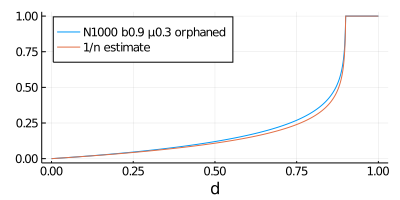

In [303]:
b = 0.9

pn = [q >= 1. ? 1. : sum( q^n*1/n for n=1:Ncutoff) / sum( 1/n for n=1:Ncutoff) for q in ds ./ b]
plot!(p_orph, ds, pn, lab="1/n estimate", legend=:topleft)

# pn = [d/b >= 1. ? 1. : sum( (d/b)^n*pn_orph[i][n] for n=1:length(pn_orph[i])) for (i,d) in enumerate(0.:0.05:0.85)]
# plot!(p_orph, 0.:0.05:0.85, pn, lab="n hist", legend=:topleft)
# pn = [d/b >= 1. ? 1. : sum( (d/b)^n*pn_estr[i][n] for n=1:length(pn_estr[i])) for (i,d) in enumerate(0.:0.05:0.85)]
# plot!(p_orph, 0.:0.05:0.85, pn, lab="n hist", legend=:topleft)

In [72]:
function mfreqs(tumor)
    count = zeros(Int, nrow(tumor)-1)
    for (i, muts) in enumerate(tumor.mutations[2:end])
        count[muts] .+= tumor.n[i+1]
    end
    count ./ sum(tumor.n)
end        

mfreqs (generic function with 1 method)

### Theory

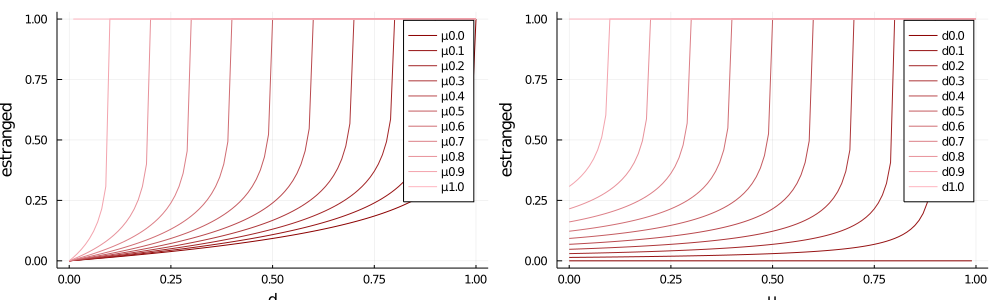

In [37]:
μs = 0.0:0.01:1.
ds = 0.0:0.01:1.
pe = Matrix{Float64}(undef, length(μs), length(ds))
let b=1.
    for (i,μ) = enumerate(μs)
        for (j,d) = enumerate(ds)
            q = d/(b*(1-μ))
            ndist = [ 1/n for n=1:1000 ]
            ndist ./= sum(ndist)
            pe[i,j] = q >= 1 ? 1. : sum( q^n * ndist[n] for n=1:1000)
        end
    end
end

p1 = plot()
for i=1:10:size(pe,1)
    μp = collect(0.0:0.01:1.)[i]
    plot!(p1, 0.0:0.01:1., pe[i,:], lab="μ$μp", color=cgrad(:reds)[1 - μp])
end
plot!(xlabel=:d)

p2 = plot()
for j=1:10:size(pe,2)
    dp = collect(0.0:0.01:1.)[j]
    plot!(p2, 0.0:0.01:1., pe[:,j], lab="d$dp", color=cgrad(:reds)[1 - dp])
end
plot!(xlabel=:μ)

plot(p1, p2, size=(1000, 300), ylab=:estranged)

In [203]:
log(500)/(b-d)

15.536520246055478

In [249]:
N=500
pvec=zeros(N+1)
qvec=zeros(N+1)
delpvec=zeros(N+1)
pvec[2]=1.
delt=0.001

b, d, μ = 0.9, 0.5, 0.1

for time in 0:delt: log(N)/(b-d)

    delpvec[1] = d*pvec[2]
    for n in 2:N-1
        delpvec[n+1]= ( b*(n-1)*(1-μ)* pvec[n] 
                     - d*n*pvec[n+1]
                     - b*(1-μ)*(n) *pvec[n+1]
                     + d*(n+1) * pvec[n+2])
    end
    delpvec[N+1] = ( b*(1-μ)*(N-1) * pvec[N]
        - d*N * pvec[end]
        - b*(1-μ)*N * pvec[end] )
    
    delpvec[2] = (  - d*pvec[2]
                    - b*(1-μ) *pvec[2]
                    + 2* d * pvec[3]
                    + b*μ*sum( collect(1:N) .* pvec[2:end]) )

    pvec .+= delt.*delpvec
    pvec/=sum(pvec)
    
    qvec .+= delt.*μ.*b.*collect(0:N).*pvec

end
qvec/=sum(qvec);

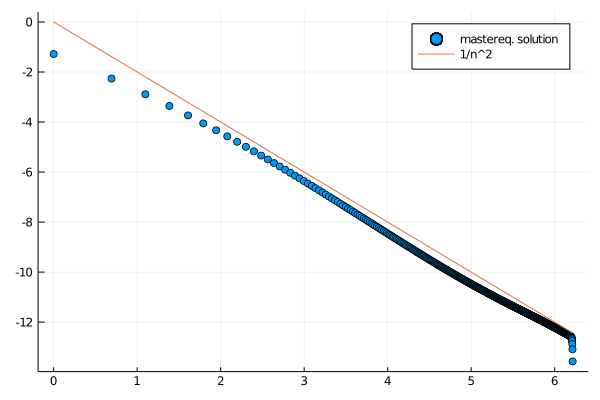

In [252]:
scatter(log.(0:N), log.(pvec), lab="mastereq. solution")
plot!(log.(0:N), logn -> -2*logn, lab="1/n^2")

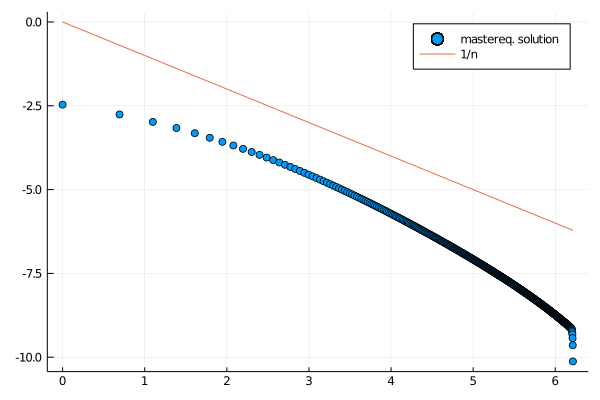

In [253]:
scatter(log.(0:N), log.(qvec), lab="mastereq. solution")
plot!(log.(0:N), logn -> -logn, lab="1/n")